In [109]:
import pickle
import numpy as np

## Function Definitions

In [110]:
def createColorSequence(df):
    colors = []
    for i in df['backend']:
        if i == 'tflite_edgetpu':
            colors.append('orange')
        elif i == 'tf_cpu':
            colors.append('red')
        else: # GPU case
            colors.append('blue')
    return colors

In [111]:
def getFamilyName(model_name):
    if 'densenet' in model_name.lower():
        model_family='DenseNet'
    elif 'inceptionresnet' in model_name.lower():
        model_family='InceptionResNet'
    elif 'efficientnet' in model_name.lower():
        model_family='EfficientNet'
    elif 'inception' in model_name.lower():
        model_family='Inception'
    elif 'mobilenet' in model_name.lower():
        model_family =  'MobileNet'
    elif 'nasnet' in model_name.lower():
        model_family =  'NASNet'
    elif 'resnet' in model_name.lower():
        model_family =  'ResNet'
    elif 'vgg' in model_name.lower():
        model_family = 'VGG'
    elif 'xception' in  model_name.lower():
        model_family = 'Xception'
    else :
        model_family = ''
    return model_family

In [120]:
def approx_USB_power_draw(row):
    if row['backend'] == 'tflite_edgetpu':
        return row['power_draw'] + 25 * (row['running_time']/3600) # assume constant 25 watt
    else:
        return row['power_draw'] 

## Load Data

In [121]:
with open('/Users/lstaay/Documents/imagenet-on-the-edge/testdatabase32.pkl', 'rb') as f:
    data = pickle.load(f)
#Add Family of 
data['family']= data['model'].apply(lambda a : getFamilyName(a))
data['approx_USB_power_draw'] = data.apply(lambda row: approx_USB_power_draw(row), axis = 1)
data

,log_name,task,dataset,model,backend,number_of_operations,number_of_unmapped_operations,input_shape,total_parameters,trainable_parameters,non_trainable_parameters,running_time,power_draw,accuracy,validation_size,batch_size,family,approx_USB_power_draw
0,infer_2023_03_31_13_20_01,infer,ImageNet,DenseNet121,tflite_edgetpu,311,0,"(None, 224, 224, 3)",8062504,7978856,83648,0.104343,0.132877,0.68750,32.0,1.0,DenseNet,0.133602
1,infer_2023_03_31_13_20_46,infer,ImageNet,DenseNet121,tf_cpu,311,0,"(None, 224, 224, 3)",8062504,7978856,83648,15.867105,220.431263,0.71875,32.0,32.0,DenseNet,220.431263
2,infer_2023_03_31_13_29_49,infer,ImageNet,DenseNet121,tf_gpu,311,0,"(None, 224, 224, 3)",8062504,7978856,83648,14.122730,226.171886,0.71875,32.0,32.0,DenseNet,226.171886
3,infer_2023_03_31_13_38_04,infer,ImageNet,DenseNet169,tflite_edgetpu,431,0,"(None, 224, 224, 3)",14307880,14149480,158400,0.121087,0.253807,0.68750,32.0,1.0,DenseNet,0.254648
4,infer_2023_03_31_13_38_54,infer,ImageNet,DenseNet169,tf_cpu,431,0,"(None, 224, 224, 3)",14307880,14149480,158400,16.916080,270.914894,0.68750,32.0,32.0,DenseNet,270.914894
5,infer_2023_03_31_13_48_32,infer,ImageNet,DenseNet169,tf_gpu,431,0,"(None, 224, 224, 3)",14307880,14149480,158400,17.741581,285.721509,0.68750,32.0,32.0,DenseNet,285.721509
6,infer_2023_03_31_13_58_46,infer,ImageNet,DenseNet201,tflite_edgetpu,511,0,"(None, 224, 224, 3)",20242984,20013928,229056,0.139833,0.390941,0.65625,32.0,1.0,DenseNet,0.391912
7,infer_2023_03_31_13_59_31,infer,ImageNet,DenseNet201,tf_cpu,511,0,"(None, 224, 224, 3)",20242984,20013928,229056,24.359007,388.250498,0.81250,32.0,32.0,DenseNet,388.250498
8,infer_2023_03_31_14_13_12,infer,ImageNet,DenseNet201,tf_gpu,511,0,"(None, 224, 224, 3)",20242984,20013928,229056,27.152720,417.832051,0.81250,32.0,32.0,DenseNet,417.832051
9,infer_2023_03_31_14_28_26,infer,ImageNet,EfficientNetB0,tflite_edgetpu,248,2,"(None, 224, 224, 3)",5330571,5288548,42023,0.146483,0.767876,0.65625,32.0,1.0,EfficientNet,0.768894


In [133]:
print(data['running_time'].sum() / 3600 * 32)
data.shape

8.175886391599972


(60, 18)

## Average Runtimes

In [98]:
analyze_running_time = data[['model','backend','running_time']][:-3]#data[['model','backend','total_parameters', 'running_time','power_draw','accuracy','number_of_unmapped_operations']]
analyze_running_time = analyze_running_time.pivot(index=['model'],columns = 'backend', values='running_time')#set_index('model').wide_to_long()
print('EDGETPU :' )
print(np.mean(analyze_running_time['tflite_edgetpu']))
print('CPU')
print(np.mean(analyze_running_time['tf_cpu']))
print('GPU')
print(np.mean(analyze_running_time['tf_gpu']))

0.1421474195443667
24.357981783779042
23.954613089953597


## Average Power Draw

In [124]:
analyze_power_draw = data[['model','backend','approx_USB_power_draw']][:-3]#data[['model','backend','total_parameters', 'running_time','power_draw','accuracy','number_of_unmapped_operations']]
analyze_power_draw = analyze_power_draw.pivot(index=['model'],columns = 'backend', values='approx_USB_power_draw')#set_index('model').wide_to_long()
print('EDGETPU :' )
print(+np.mean(analyze_power_draw['tflite_edgetpu']))
print('CPU')
print(np.mean(analyze_power_draw['tf_cpu']))
print('GPU')
print(np.mean(analyze_power_draw['tf_gpu']))

EDGETPU :
0.4404259170115503
CPU
305.8775670035753
GPU
377.77818718250523


In [134]:
data[['model','backend','accuracy','family']][:-3].groupby(['family','backend']).mean()

/var/folders/0x/0mxpptjd20x3bk4b9bhllszr0000gn/T/ipykernel_38767/49169233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[['model','backend','accuracy','family']][:-3].groupby(['family','backend']).mean()


accuracy
family          backend                 
DenseNet        tf_cpu          0.739583
                tf_gpu          0.739583
                tflite_edgetpu  0.677083
EfficientNet    tf_cpu          0.781250
                tf_gpu          0.781250
                tflite_edgetpu  0.656250
Inception       tf_cpu          0.750000
                tf_gpu          0.750000
                tflite_edgetpu  0.781250
InceptionResNet tf_cpu          0.812500
                tf_gpu          0.812500
MobileNet       tf_cpu          0.640625
                tf_gpu          0.640625
                tflite_edgetpu  0.640625
NASNet          tf_cpu          0.781250
                tf_gpu          0.781250
                tflite_edgetpu  0.625000
ResNet          tf_cpu          0.692708
                tf_gpu          0.692708
                tflite_edgetpu  0.687500
VGG             tf_cpu          0.687500
                tf_gpu          0.687500
Xception        tf_cpu          0.781250
                tf_gpu          0.781250
                tflite_edgetpu  0.687500

## Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


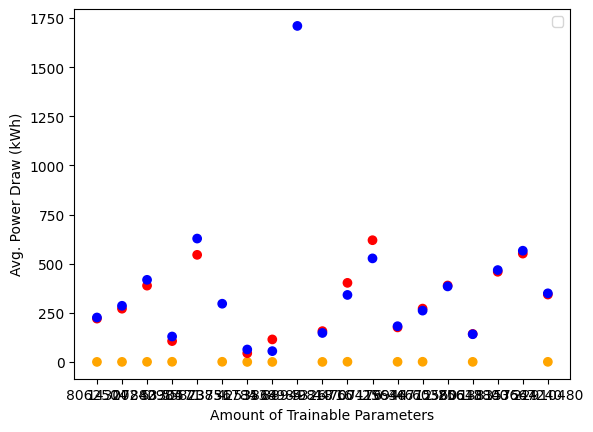

In [126]:
import pandas as pd 
from matplotlib import pyplot as plt
energy_df = data[data['power_draw'].notna() ]
#energy_df = energy_df[energy_df['family']== 'DenseNet']
x = energy_df['total_parameters']
y = energy_df['approx_USB_power_draw']
plt.xlabel("Amount of Trainable Parameters")
plt.ylabel("Avg. Power Draw (kWh)")

plt.scatter(x, y, c = createColorSequence(energy_df))
plt.legend()
plt.show()
#energy_df.plot.scatter( x='total_parameters', y = 'power_draw', c = colors)


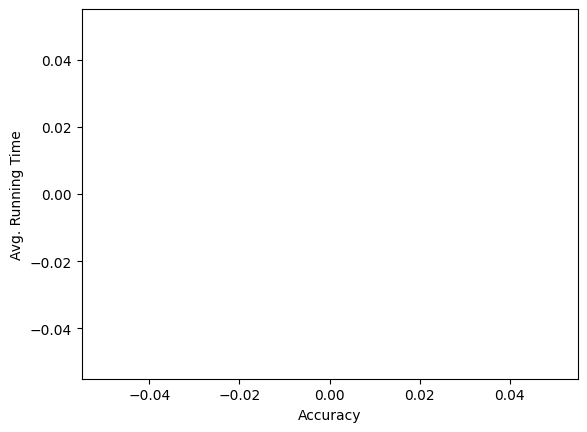

In [127]:
energy_df = data[data['backend']=='tflite-edgetu']
x = energy_df['accuracy']
y = energy_df['running_time']
plt.xlabel("Accuracy")
plt.ylabel("Avg. Running Time")

plt.scatter(x, y, c = createColorSequence( energy_df))
plt.show()


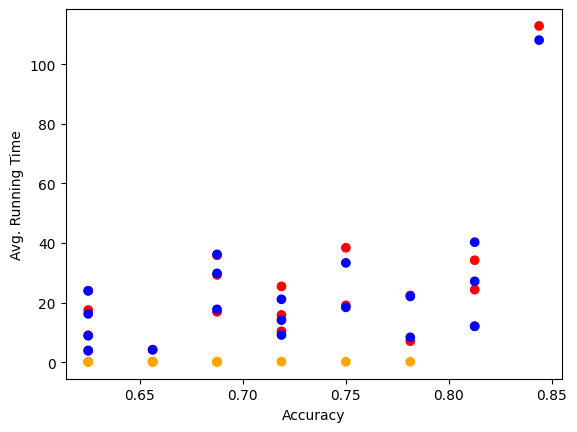

In [128]:
energy_df = data#[data['backend']=='tflite_edgetpu']

x = energy_df['accuracy']
y = energy_df['running_time']
plt.xlabel("Accuracy")
plt.ylabel("Avg. Running Time")

plt.scatter(x, y, c = createColorSequence(energy_df))
plt.show()